In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==1.1.3
!pip install joblib==1.1.0
!pip install mglearn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-learn==1.1.3 (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2, 0.22.2.post1, 0.23.0rc1, 0.23.0, 0.23.1, 0.23.2, 0.24.dev0, 0.24.0rc1, 0.24.0, 0.24.1, 0.24.2, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2)
ERROR: No matching distribution found for scikit-learn==1.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 k

#Metrics

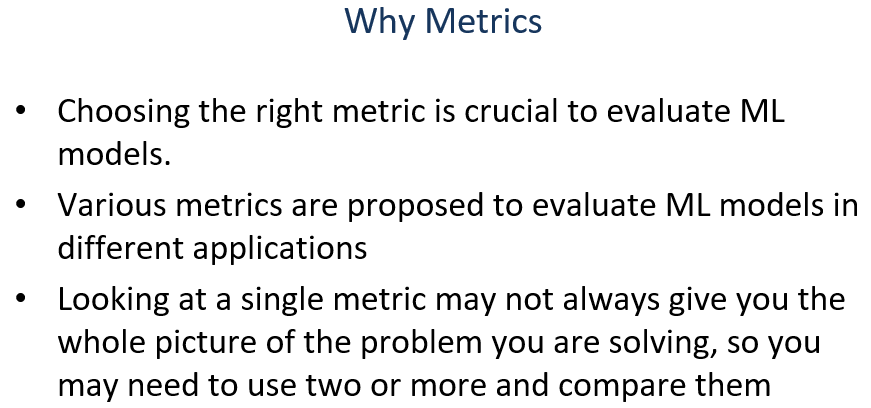

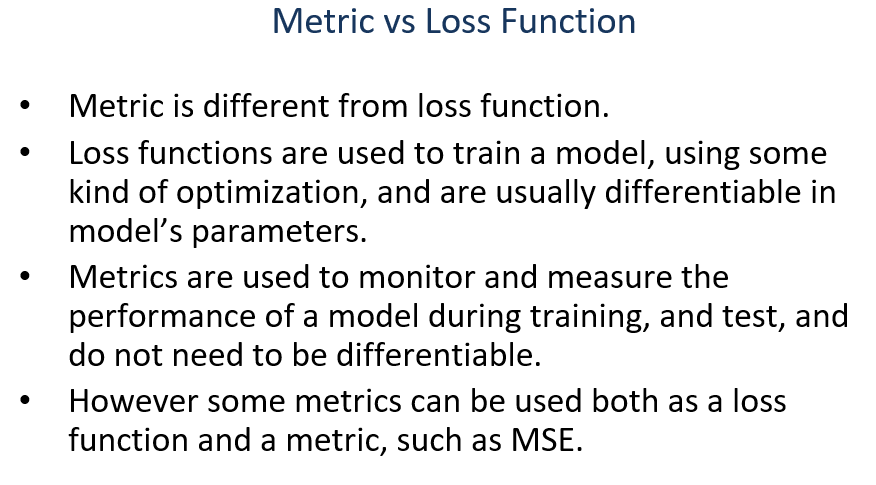

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
print(X.shape)



(442, 10)


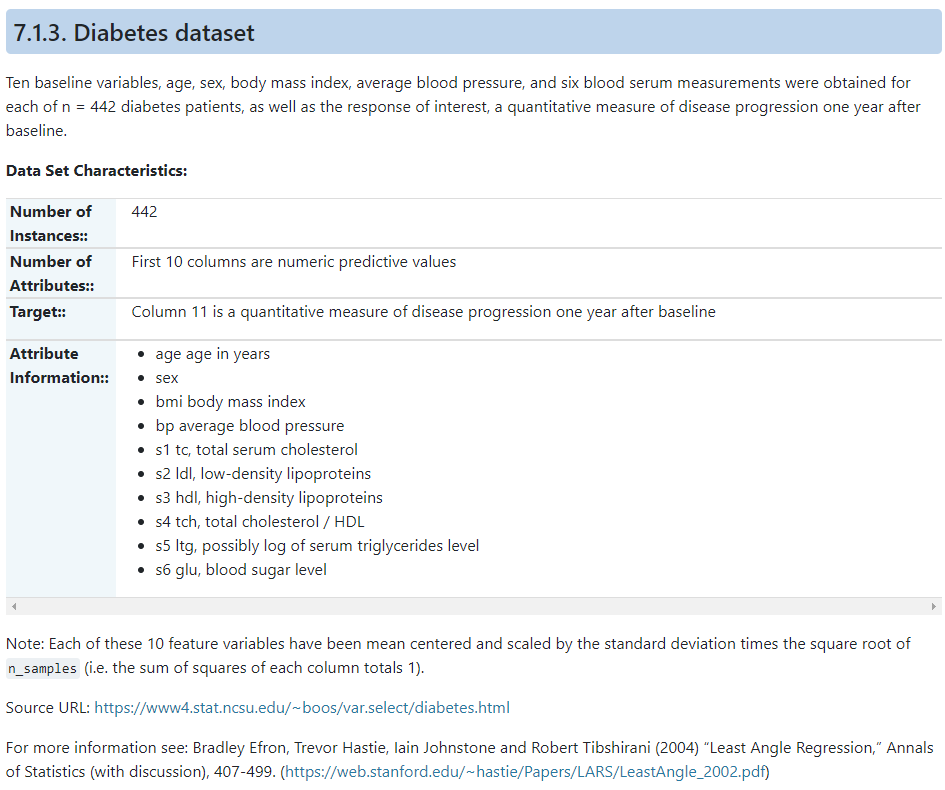

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  dissease_progression  
0   -0.002592  0.019908 -0.017646                 151.0  
1   -0.039493 -0.068330 -0.092204                  75.0  
2   -0.002592  0.002864 -0.025930                 141.0  
3    0.034309  0.022692 -0.009362                 206.0  
4   -0.002592 -0.031991 -0.046641                 135.0  
..        ...       ...       ...                   ...  
437 -0.002592  0.031193  0.007207                 178.0  
438  0.034309 -0.018118  0.044485                 104.0  
439 -0.011080 -0.046879  0.015491                 132.0  
440  0.026560  0.044528 -0.025930                 220.0  
441 -0.039493 -0.004220  0.003064                  57.0  

[442 rows x 11 columns]

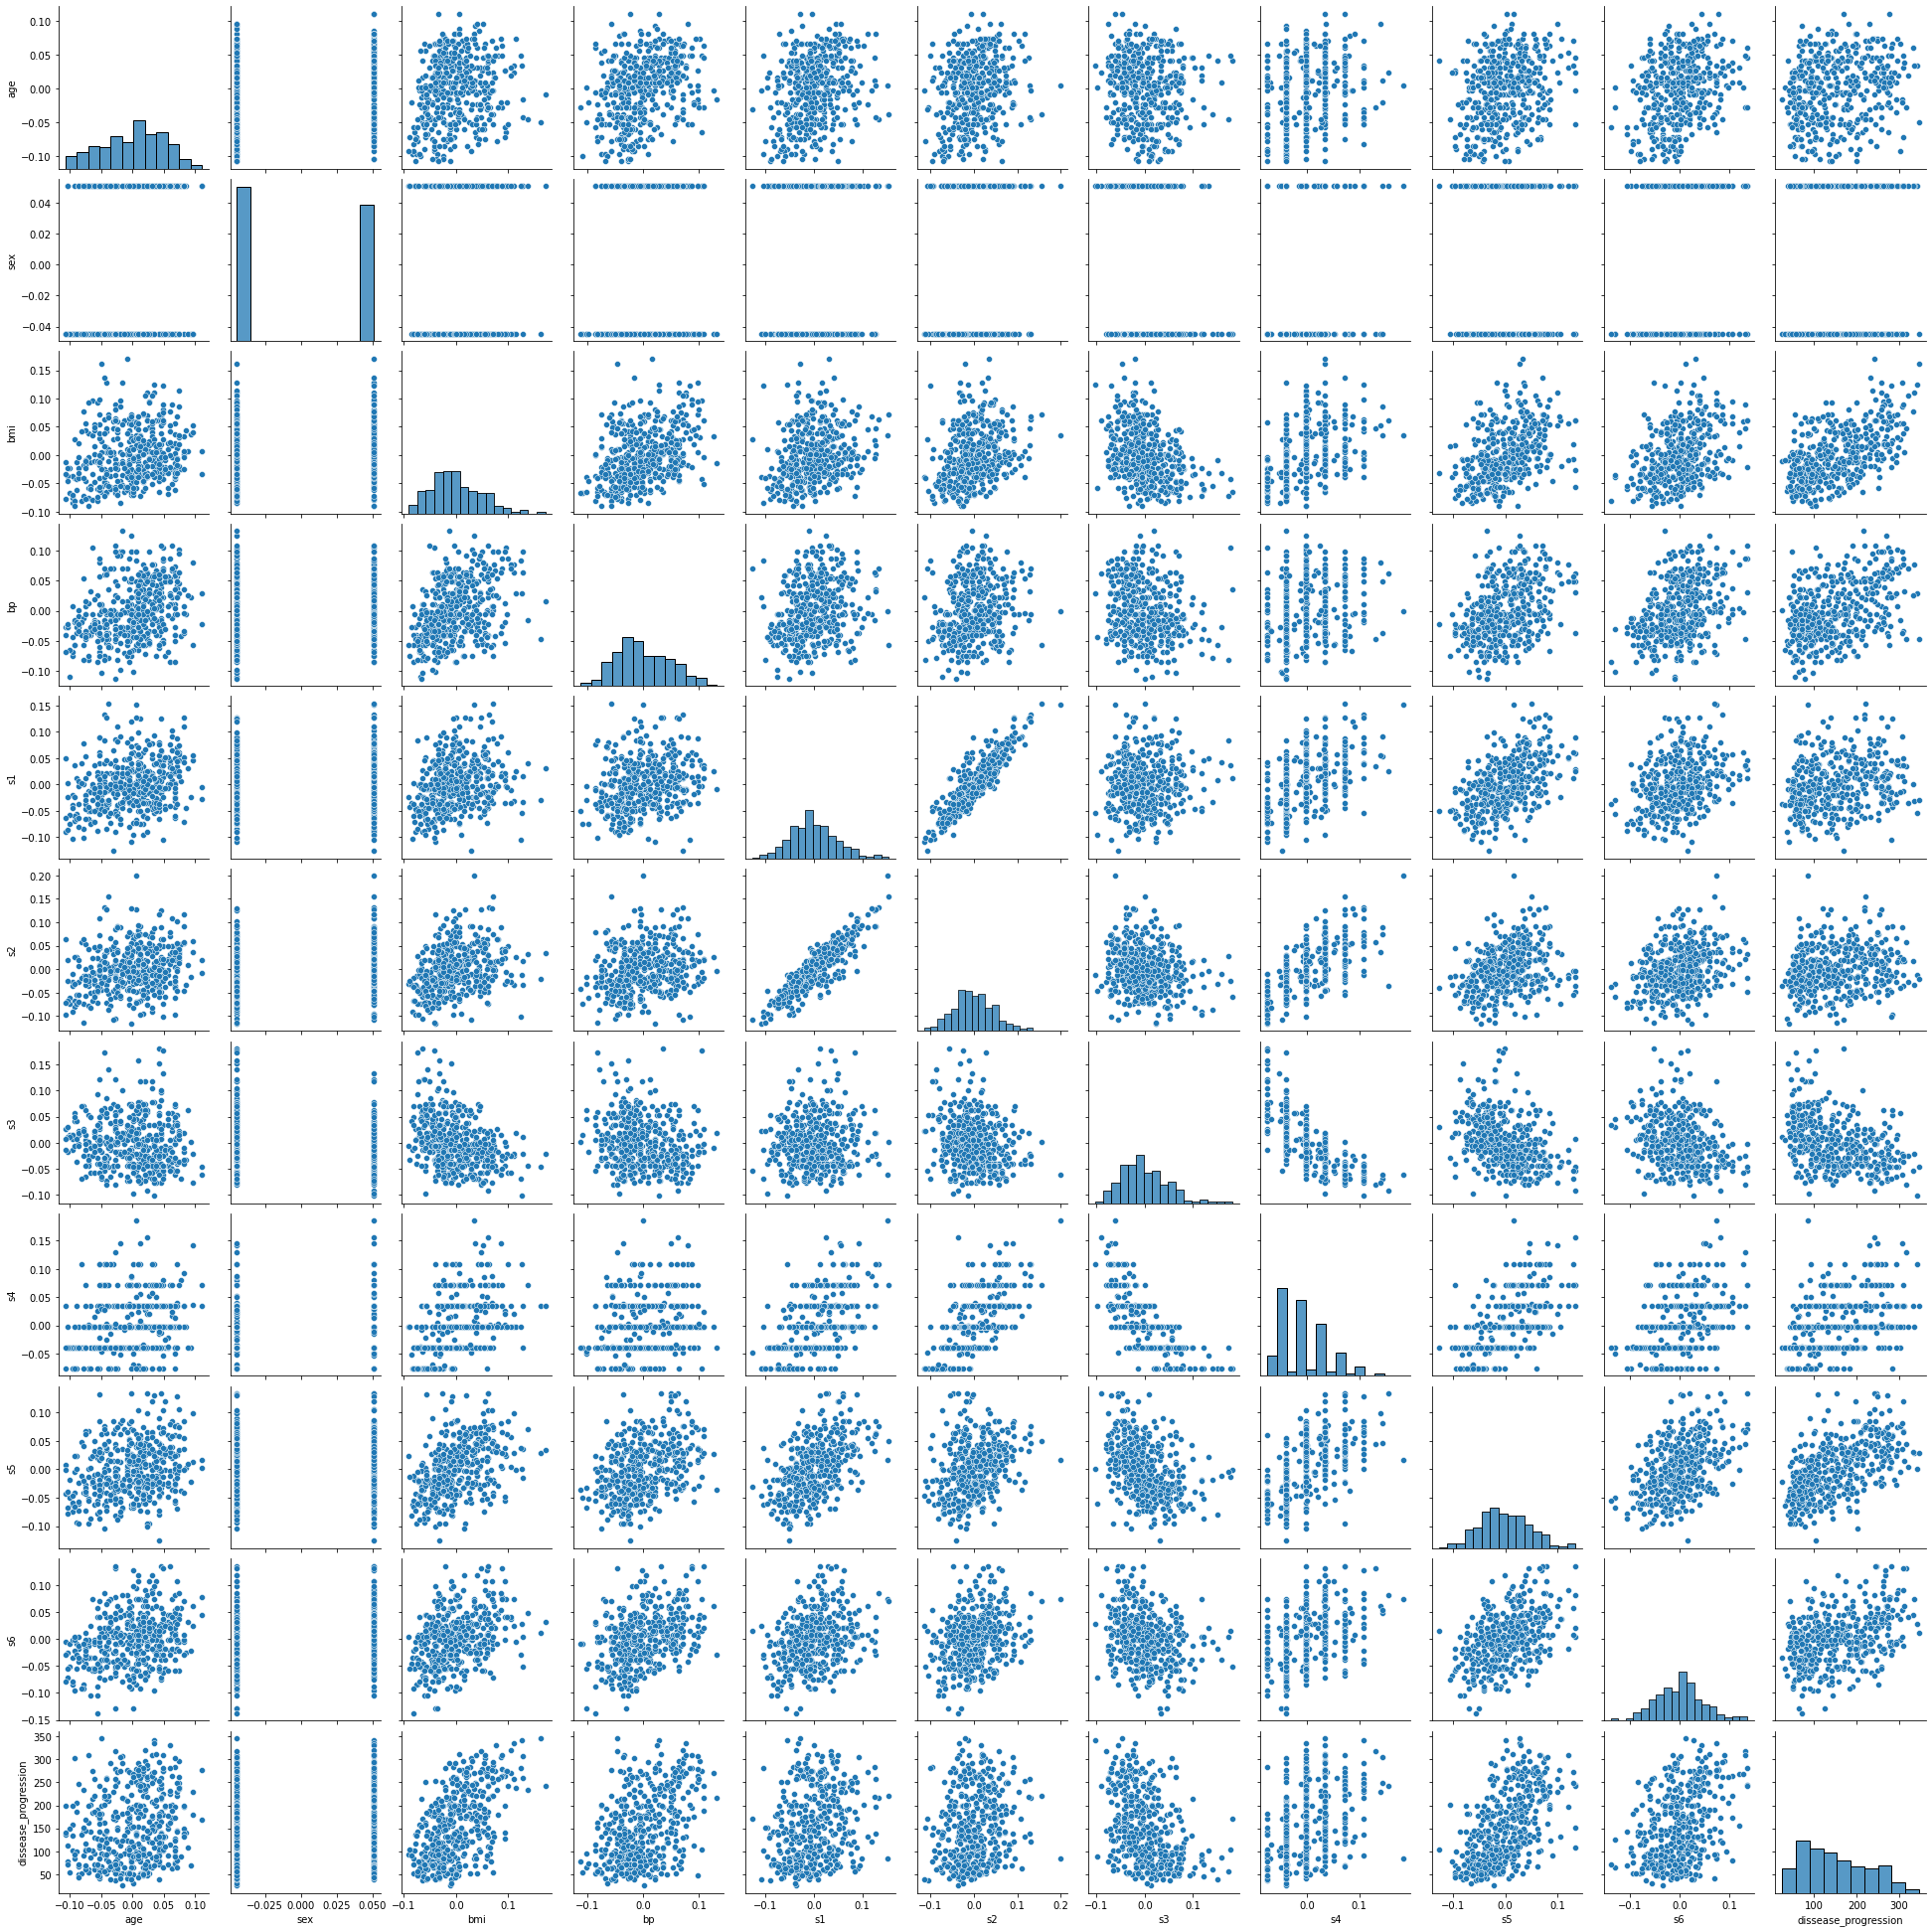

In [ ]:
diabetes
diabetes_df= pd.DataFrame(data=np.column_stack((diabetes.data,diabetes.target)),columns=[*diabetes.feature_names, 'dissease_progression'])
display(diabetes_df)
sns.pairplot(diabetes_df)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
knnr = KNeighborsRegressor()
models=[lr,svr,rfr,knnr]
model_names=['Linear Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'KNN Regressor']

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  print(model_names[i]+" training score :", clf.score(X_train,y_train))
  print(model_names[i]+" test score :", clf.score(X_test,y_test))



Linear Regressor training score : 0.555437148935302
Linear Regressor test score : 0.35940090989715534
Support Vector Regressor training score : 0.1737280376110264
Support Vector Regressor test score : 0.13842868702766098
Random Forest Regressor training score : 0.9273953324455808
Random Forest Regressor test score : 0.23283604407246172
KNN Regressor training score : 0.6238758317268587
KNN Regressor test score : 0.18912404854026388


##Metrics for Regression

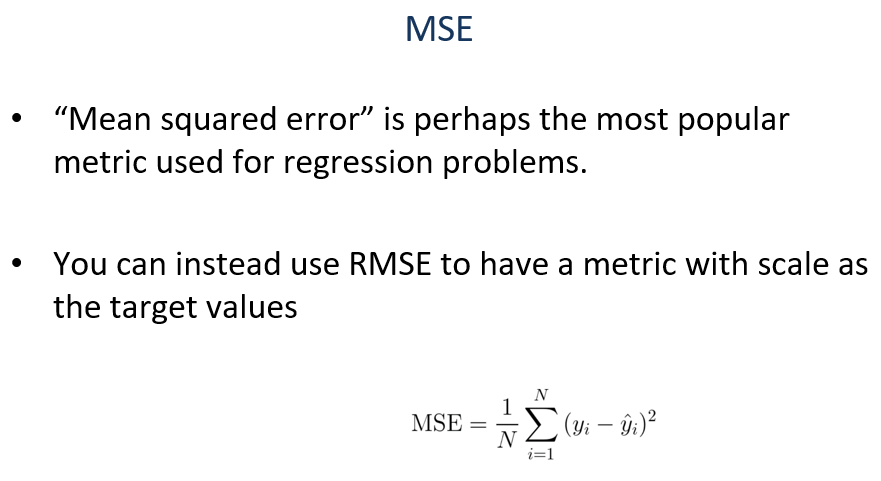

In [ ]:
from sklearn.metrics import mean_squared_error

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train mse:", mean_squared_error(y_train, y_train_pred))
  print(model_names[i]+" test mse:", mean_squared_error(y_test, y_test_pred))
  


Linear Regressor train mse: 2780.062316059081
Linear Regressor test mse: 3180.1988368427274
Support Vector Regressor train mse: 5167.070392751895
Support Vector Regressor test mse: 4277.196345895227
Random Forest Regressor train mse: 460.3469752265861
Random Forest Regressor test mse: 3722.5147405405405
KNN Regressor train mse: 2352.0827794561933
KNN Regressor test mse: 4025.5236036036035


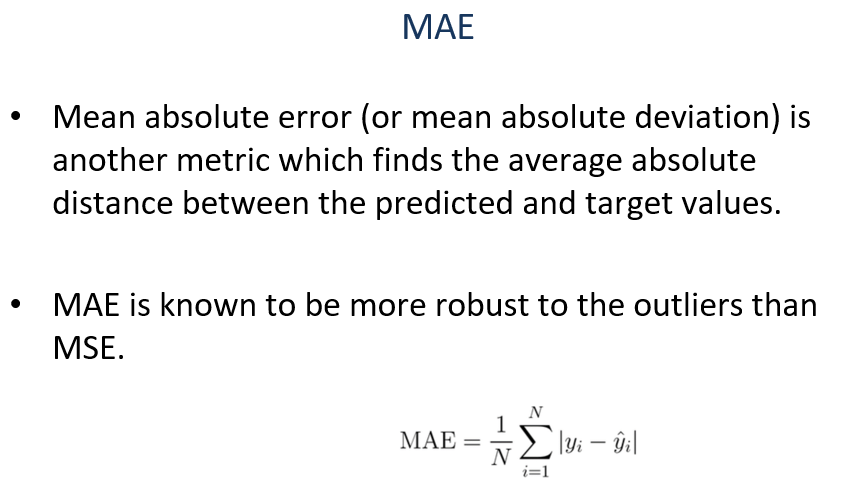

In [ ]:
from sklearn.metrics import mean_absolute_error

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train mae:", mean_absolute_error(y_train, y_train_pred))
  print(model_names[i]+" test mae:", mean_absolute_error(y_test, y_test_pred))

Linear Regressor train mae: 42.85435785782478
Linear Regressor test mae: 45.120987683251016
Support Vector Regressor train mae: 59.97948851914353
Support Vector Regressor test mae: 52.45903046955925
Random Forest Regressor train mae: 17.32978851963746
Random Forest Regressor test mae: 48.69522522522523
KNN Regressor train mae: 37.884592145015105
KNN Regressor test mae: 48.90450450450451


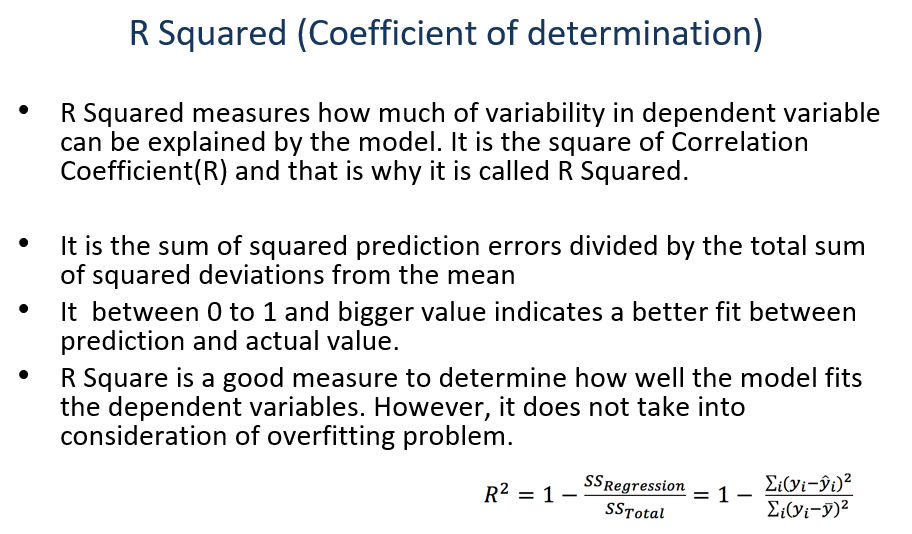

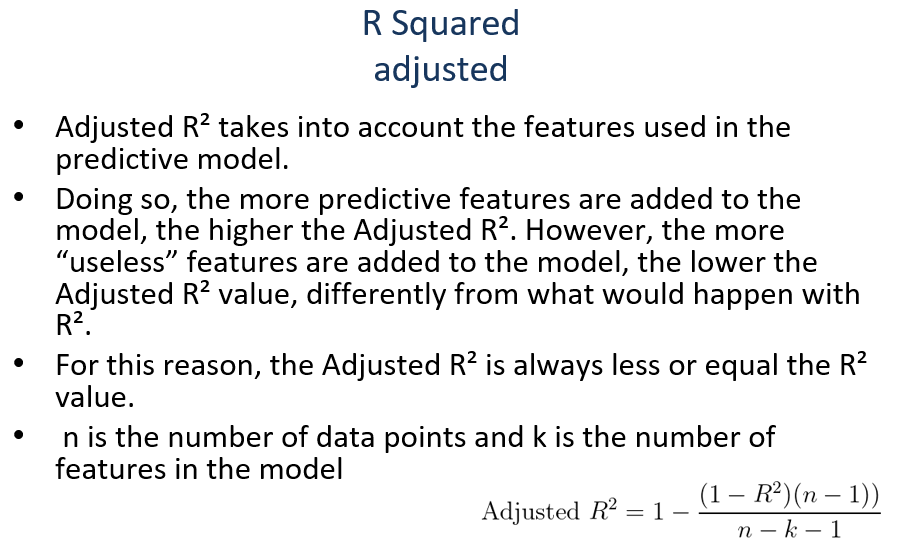

In [ ]:
from sklearn.metrics import r2_score

def r2_score_adj(X,y,y_pred):
   r2=r2_score(y, y_pred)
   n,k=np.shape(X)
   adj_r2= 1 - ( (1-r2)*(n-1) / (n-k-1) )
   return adj_r2

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train R^2:", r2_score(y_train, y_train_pred))
  print(model_names[i]+" test R^2:", r2_score(y_test, y_test_pred))
  print(model_names[i]+" train R^2 adjusted:", r2_score_adj(X_train, y_train, y_train_pred))
  print(model_names[i]+" test R^2 adjusted:", r2_score_adj(X_test, y_test, y_test_pred))



Linear Regressor train R^2: 0.555437148935302
Linear Regressor test R^2: 0.35940090989715534
Linear Regressor train R^2 adjusted: 0.5415445598395302
Linear Regressor test R^2 adjusted: 0.2953410008868709
Support Vector Regressor train R^2: 0.1737280376110264
Support Vector Regressor test R^2: 0.13842868702766098
Support Vector Regressor train R^2 adjusted: 0.1479070387863709
Support Vector Regressor test R^2 adjusted: 0.05227155573042708
Random Forest Regressor train R^2: 0.9234388034019818
Random Forest Regressor test R^2: 0.20754949516026222
Random Forest Regressor train R^2 adjusted: 0.9210462660082938
Random Forest Regressor test R^2 adjusted: 0.12830444467628854
KNN Regressor train R^2: 0.6238758317268587
KNN Regressor test R^2: 0.18912404854026388
KNN Regressor train R^2 adjusted: 0.612121951468323
KNN Regressor test R^2 adjusted: 0.10803645339429024


##Metrics for Classification

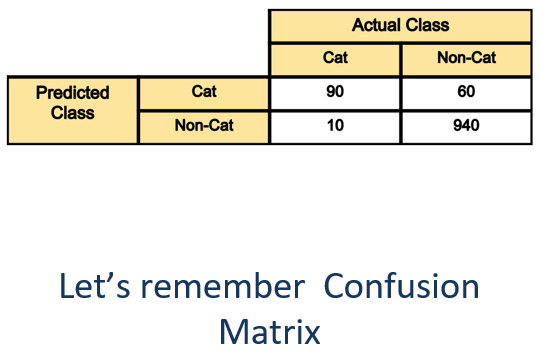

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cancer = load_breast_cancer()
class_names = cancer.target_names
X, y = cancer.data, cancer.target
print(X.shape)
cancer
cancer_df= pd.DataFrame(data=np.column_stack((cancer.data,cancer.target)),columns=[*cancer.feature_names, 'malignity'])
display(cancer_df)
sns.pairplot(cancer_df)


(569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  malignity  
0                  0.2654          0.4601                  0.11890        0.0  
1                  0.1860          0.2750                  0.08902        0.0  
2                  0.2430          0.3613                  0.08758        0.0  
3                  0.2575          0.6638                  0.17300        0.0  
4                  0.1625          0.2364        

Error in callback <function flush_figures at 0x7f44ba48a050> (for post_execute):


KeyboardInterrupt: ignored

Training set score: 0.533
Test set score: 0.448


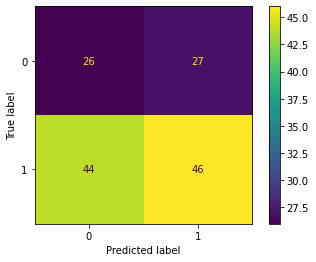

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, stratify=y, random_state=42)

clf= DummyClassifier(strategy="uniform").fit(X_train, y_train)
predictions = clf.predict(X_test)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression(solver='liblinear')
svr = SVC()
rfr = RandomForestClassifier()
knnr = KNeighborsClassifier()
models=[lr,svr,rfr,knnr]
model_names=['LogReg Classifier', 'Support Vector Classifier', 'Random Forest Classifier', 'KNN Classifier']

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  print(model_names[i]+" training score :", clf.score(X_train,y_train))
  print(model_names[i]+" test score :", clf.score(X_test,y_test))


LogReg Classifier training score : 0.960093896713615
LogReg Classifier test score : 0.958041958041958
Support Vector Classifier training score : 0.903755868544601
Support Vector Classifier test score : 0.9370629370629371
Random Forest Classifier training score : 1.0
Random Forest Classifier test score : 0.972027972027972
KNN Classifier training score : 0.9413145539906104
KNN Classifier test score : 0.9370629370629371


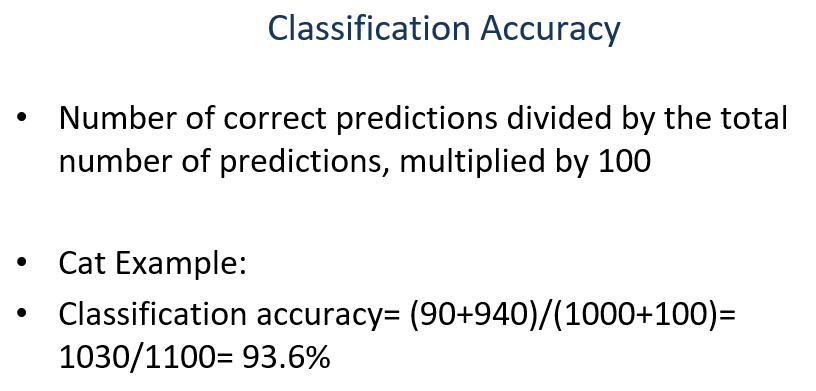

In [ ]:
from sklearn.metrics import accuracy_score

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train accuracy:", accuracy_score(y_train, y_train_pred))
  print(model_names[i]+" test accuracy:", accuracy_score(y_test, y_test_pred))


LogReg Classifier train accuracy: 0.960093896713615
LogReg Classifier test accuracy: 0.958041958041958
Support Vector Classifier train accuracy: 0.903755868544601
Support Vector Classifier test accuracy: 0.9370629370629371
Random Forest Classifier train accuracy: 1.0
Random Forest Classifier test accuracy: 0.965034965034965
KNN Classifier train accuracy: 0.9413145539906104
KNN Classifier test accuracy: 0.9370629370629371


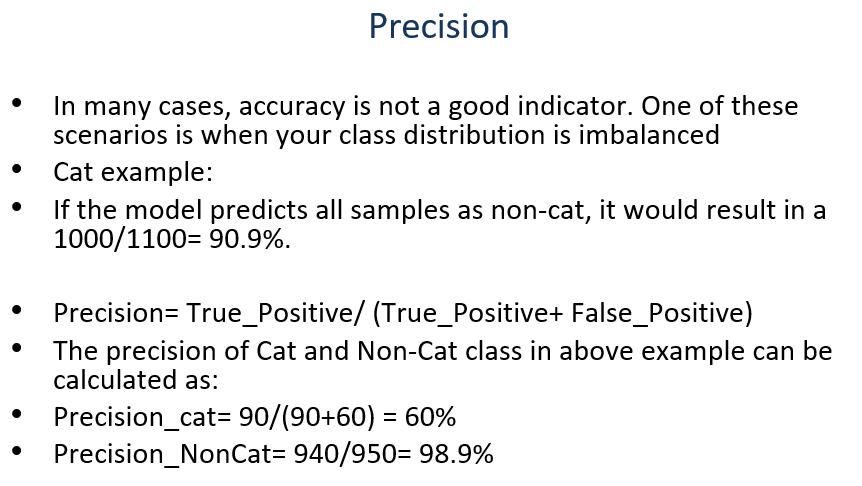

In [ ]:
from sklearn.metrics import precision_score

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train accuracy:", precision_score(y_train, y_train_pred))
  print(model_names[i]+" test accuracy:", precision_score(y_test, y_test_pred))


LogReg Classifier train accuracy: 0.9629629629629629
LogReg Classifier test accuracy: 0.9883720930232558
Support Vector Classifier train accuracy: 0.8717105263157895
Support Vector Classifier test accuracy: 0.9175257731958762
Random Forest Classifier train accuracy: 1.0
Random Forest Classifier test accuracy: 0.9886363636363636
KNN Classifier train accuracy: 0.9448529411764706
KNN Classifier test accuracy: 0.9550561797752809


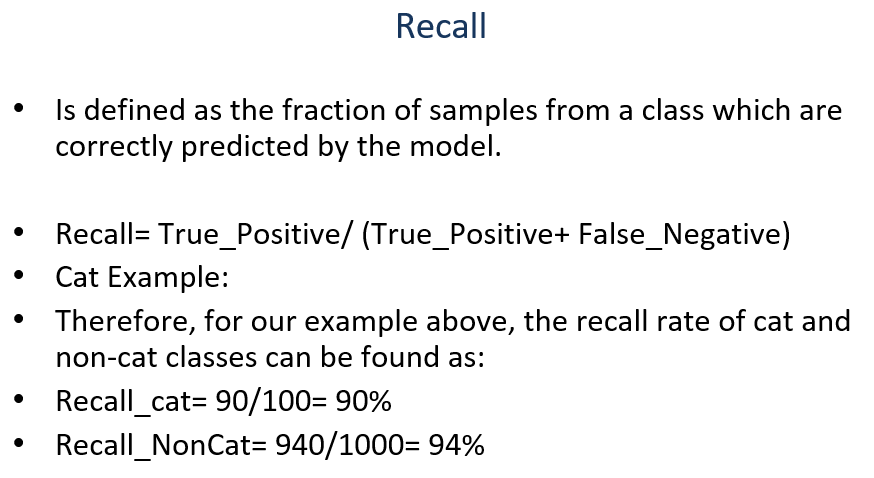

In [ ]:
from sklearn.metrics import recall_score


for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train recall:", recall_score(y_train, y_train_pred))
  print(model_names[i]+" test recall:", recall_score(y_test, y_test_pred))


LogReg Classifier train recall: 0.9737827715355806
LogReg Classifier test recall: 0.9444444444444444
Support Vector Classifier train recall: 0.9925093632958801
Support Vector Classifier test recall: 0.9888888888888889
Random Forest Classifier train recall: 1.0
Random Forest Classifier test recall: 0.9666666666666667
KNN Classifier train recall: 0.9625468164794008
KNN Classifier test recall: 0.9444444444444444


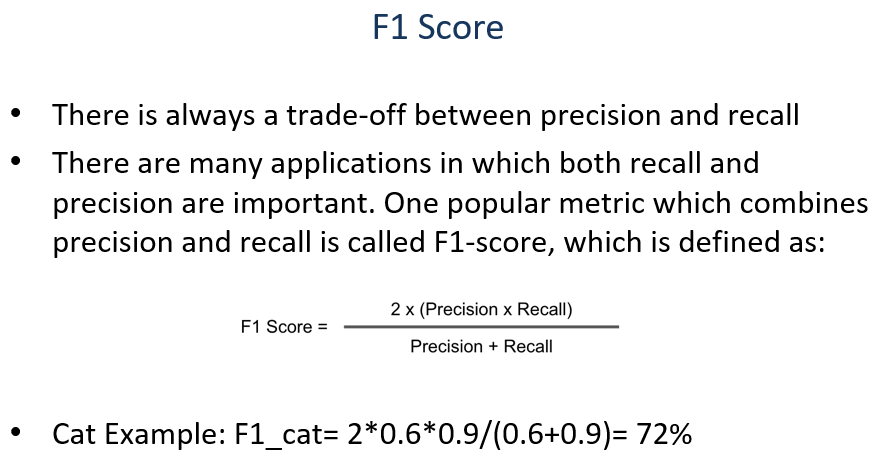

In [ ]:
from sklearn.metrics import f1_score

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  print(model_names[i]+" train accuracy:", f1_score(y_train, y_train_pred))
  print(model_names[i]+" test accuracy:", f1_score(y_test, y_test_pred))



LogReg Classifier train accuracy: 0.968342644320298
LogReg Classifier test accuracy: 0.9659090909090908
Support Vector Classifier train accuracy: 0.9281961471103327
Support Vector Classifier test accuracy: 0.9518716577540107
Random Forest Classifier train accuracy: 1.0
Random Forest Classifier test accuracy: 0.9775280898876404
KNN Classifier train accuracy: 0.953617810760668
KNN Classifier test accuracy: 0.9497206703910613


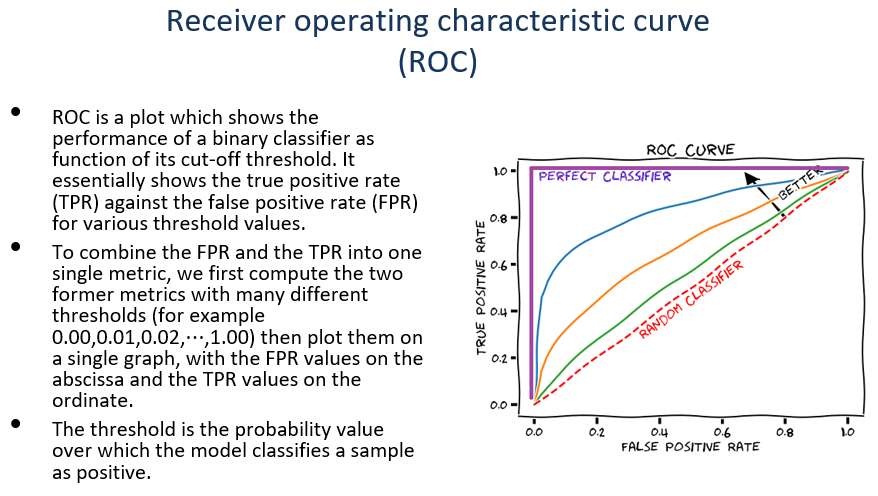

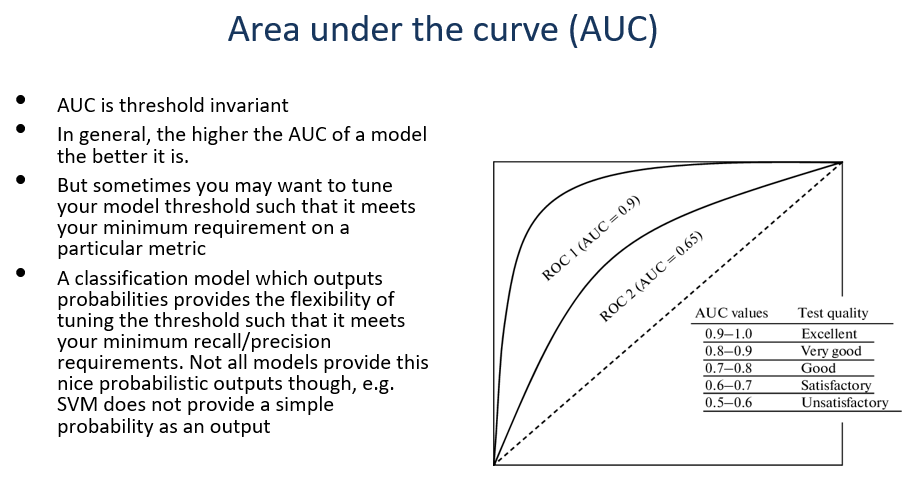

LogReg Classifier train AUC: 0.9554448448872872
LogReg Classifier test AUC: 0.9627882599580713
Support Vector Classifier train AUC: 0.8736131722139778
Support Vector Classifier test AUC: 0.9189727463312369
Random Forest Classifier train AUC: 1.0
Random Forest Classifier test AUC: 0.9683438155136269
KNN Classifier train AUC: 0.9341035969189457
KNN Classifier test AUC: 0.9344863731656184


<Figure size 432x288 with 0 Axes>

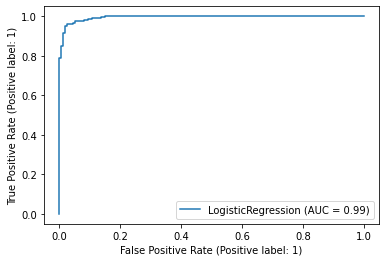

<Figure size 432x288 with 0 Axes>

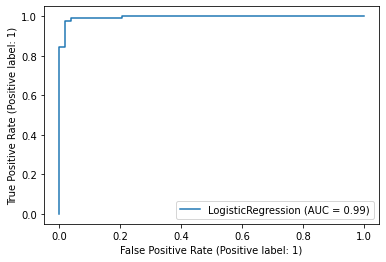

<Figure size 432x288 with 0 Axes>

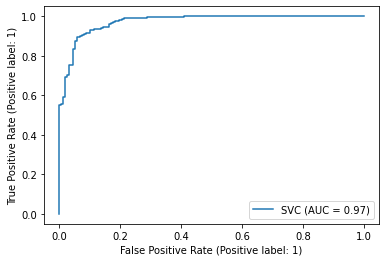

<Figure size 432x288 with 0 Axes>

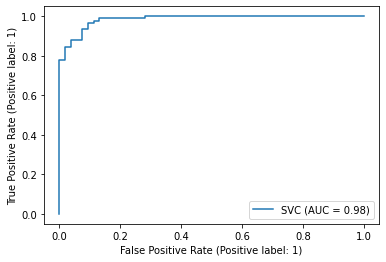

<Figure size 432x288 with 0 Axes>

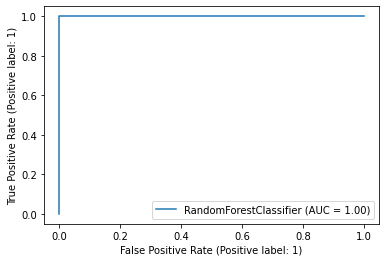

<Figure size 432x288 with 0 Axes>

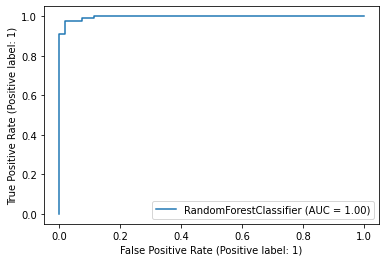

<Figure size 432x288 with 0 Axes>

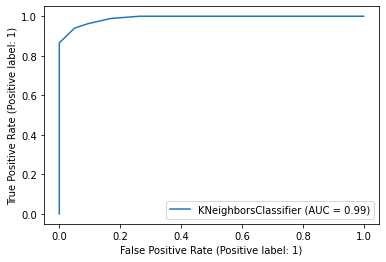

<Figure size 432x288 with 0 Axes>

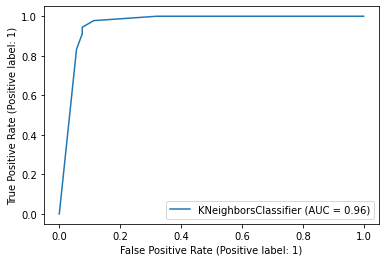

In [ ]:
from sklearn.metrics import RocCurveDisplay


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve


for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  fig = plt.figure()
  RocCurveDisplay.from_estimator(clf,X_train,y_train)
  fig = plt.figure()
  RocCurveDisplay.from_estimator(clf,X_test,y_test)
  print(model_names[i]+" train AUC:", roc_auc_score(y_train, y_train_pred))
  print(model_names[i]+" test AUC:", roc_auc_score(y_test, y_test_pred))



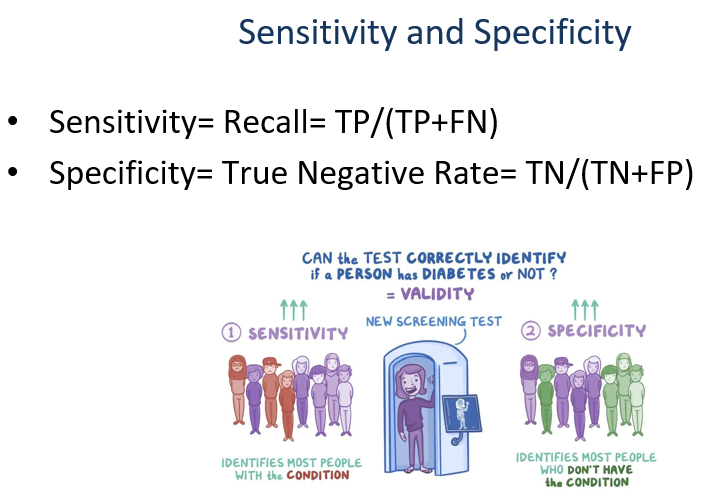

In [ ]:
def sensitivity_score(conf_mat):
  TN,FN=conf_mat[0]
  FP,TP=conf_mat[1]
  sensitivity=TP/(TP+FN)
  return sensitivity

def specificity_score(conf_mat):
  TN,FN=conf_mat[0]
  FP,TP=conf_mat[1]
  specificity=TN/(TN+FP)
  return specificity

for i, clf in enumerate(models):
  clf = clf.fit(X_train, y_train)
  y_train_pred=clf.predict(X_train)
  y_test_pred=clf.predict(X_test)
  cm_train = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
  cm_test = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
  print(model_names[i]+" train sensitivity:", sensitivity_score(cm_train))
  print(model_names[i]+" test sensitivity:", sensitivity_score(cm_test))
  print(model_names[i]+" train specificity:", specificity_score(cm_train))
  print(model_names[i]+" test specificity:", specificity_score(cm_test))


LogReg Classifier train sensitivity: 0.9629629629629629
LogReg Classifier test sensitivity: 0.9883720930232558
LogReg Classifier train specificity: 0.9551282051282052
LogReg Classifier test specificity: 0.9122807017543859
Support Vector Classifier train sensitivity: 0.8717105263157895
Support Vector Classifier test sensitivity: 0.9175257731958762
Support Vector Classifier train specificity: 0.9836065573770492
Support Vector Classifier test specificity: 0.9782608695652174
Random Forest Classifier train sensitivity: 1.0
Random Forest Classifier test sensitivity: 0.9775280898876404
Random Forest Classifier train specificity: 1.0
Random Forest Classifier test specificity: 0.9444444444444444
KNN Classifier train sensitivity: 0.9448529411764706
KNN Classifier test sensitivity: 0.9550561797752809
KNN Classifier train specificity: 0.935064935064935
KNN Classifier test specificity: 0.9074074074074074


#Model evaluation and improvement

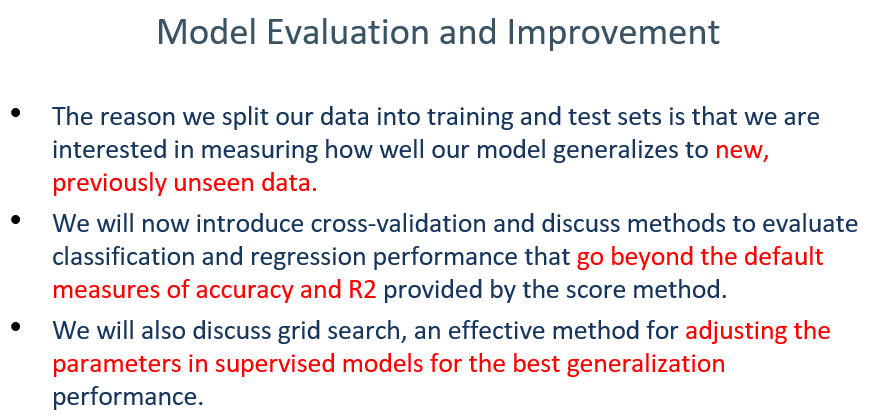

##Cross-Validation

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


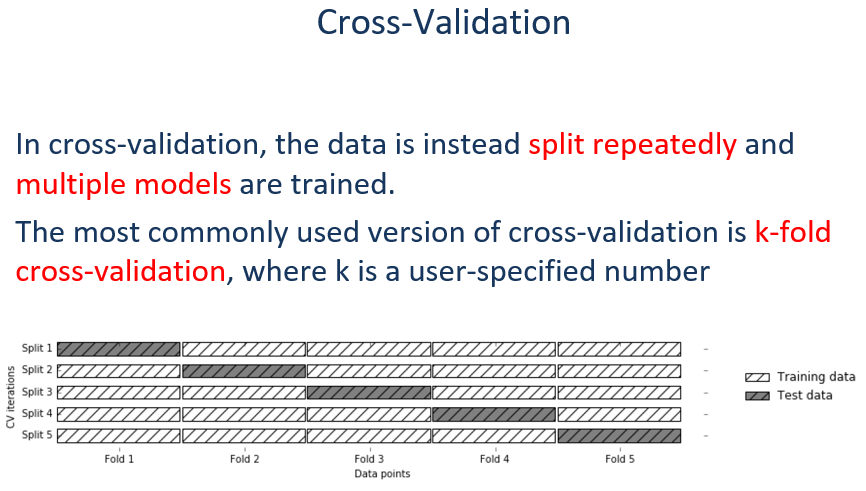

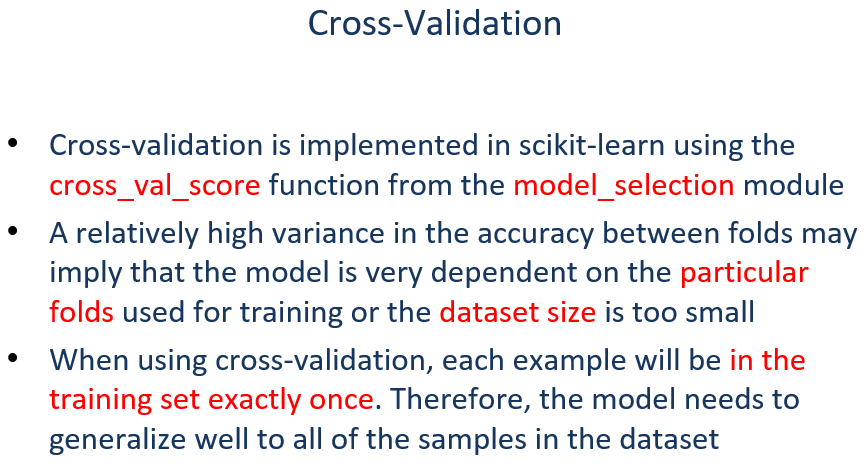

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='liblinear', C=0.5)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("Standard deviation of cross-validation score: {:.2f}".format(scores.std()))

Cross-validation scores: [0.93333333 0.96666667 0.93333333 0.9        1.        ]
Average cross-validation score: 0.95
Standard deviation of cross-validation score: 0.03


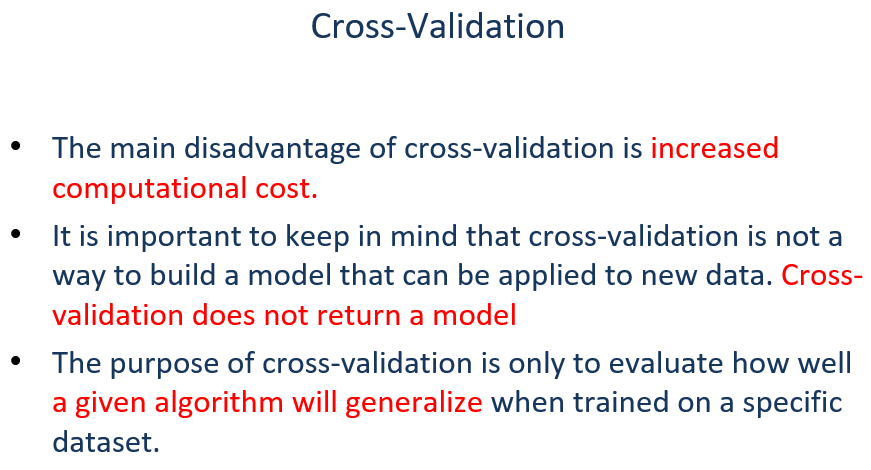

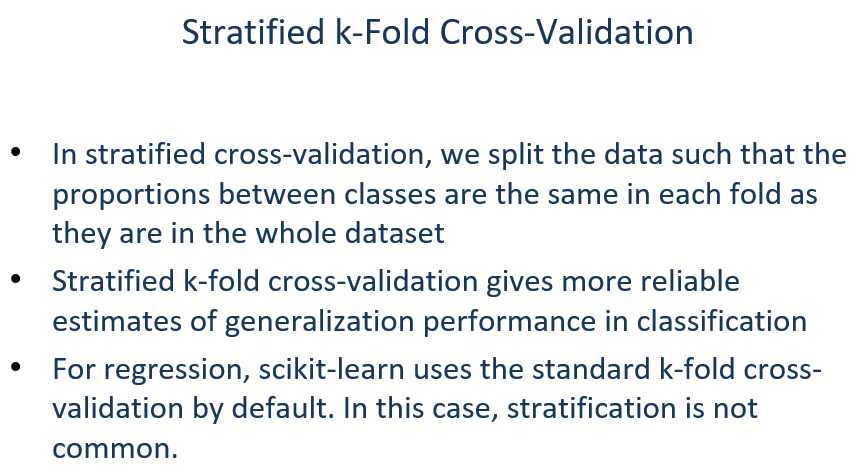

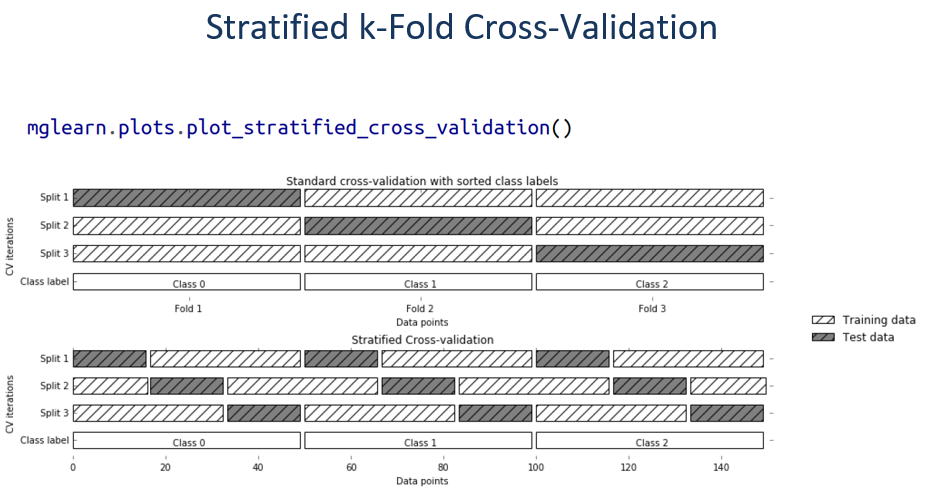

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))
scores.mean()
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Cross-validation scores:
[1.         0.9        0.06666667 0.96666667 0.3       ]
Cross-validation scores:
[0. 0. 0.]
Cross-validation scores:
[0.84 0.94 0.94]


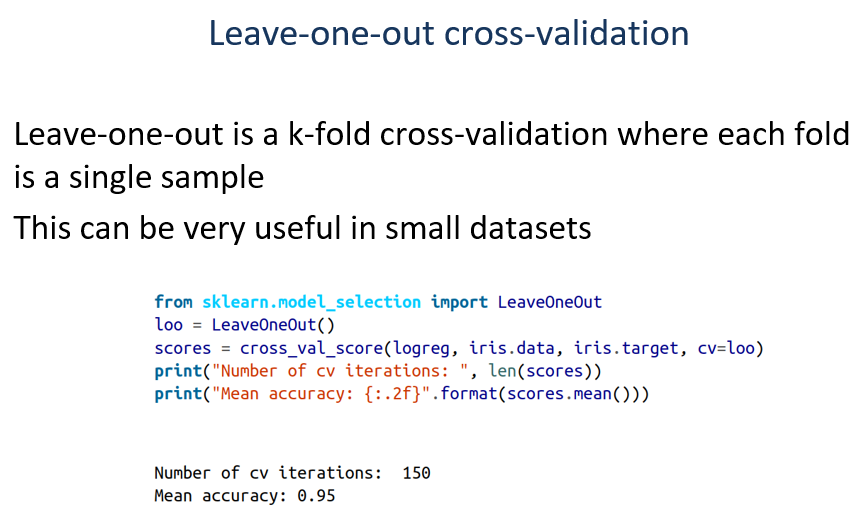

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.94


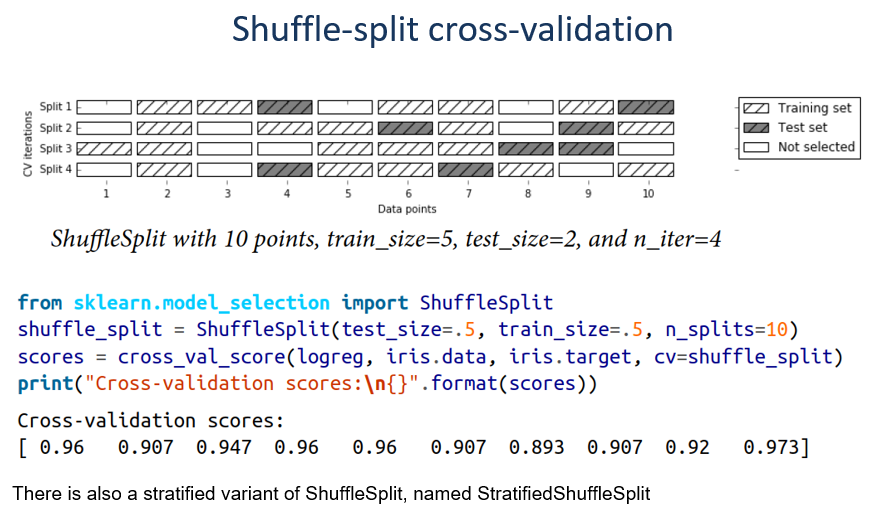

In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.96       0.94666667 0.93333333 0.90666667 0.76       0.88
 0.96       0.96       0.93333333 0.97333333]


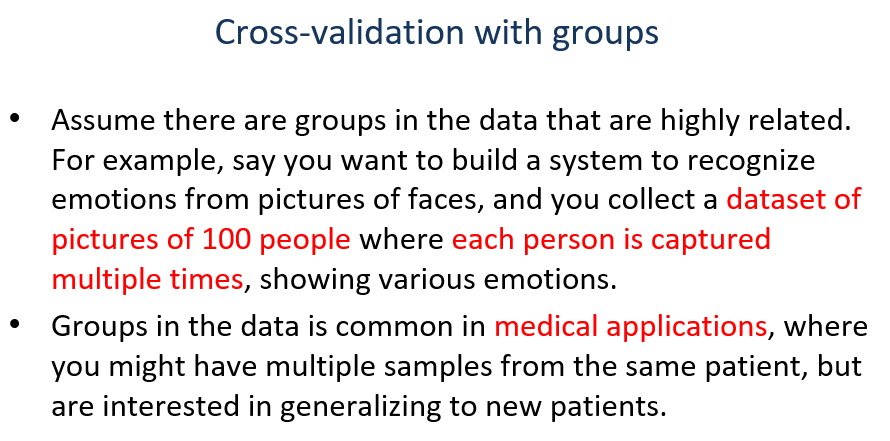

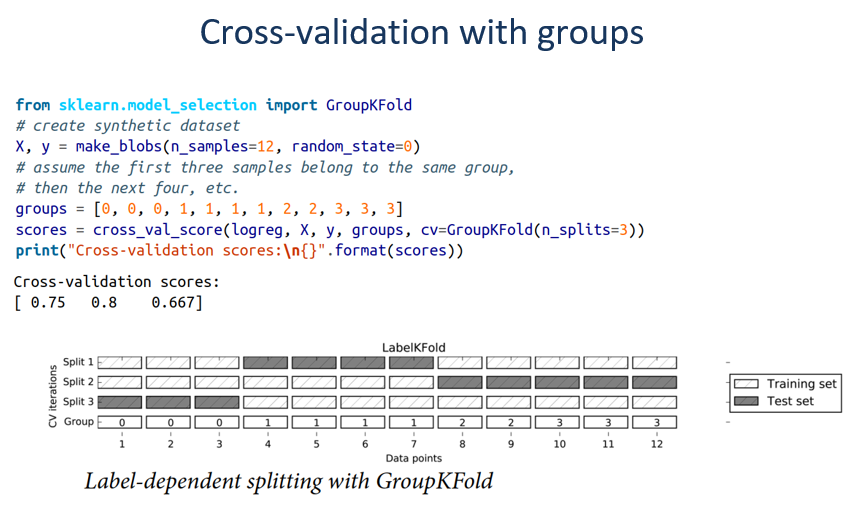

Cross-validation scores:
[0.75       0.4        0.66666667]


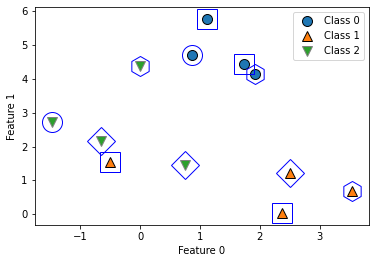

In [ ]:
import mglearn

from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
mymarkers=["h","s","o","D"]
for sx,sg in zip(X,groups):
  plt.plot(sx[0],sx[1],marker=mymarkers[sg],fillstyle='none', color='b', markersize=20)
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

##Grid Search

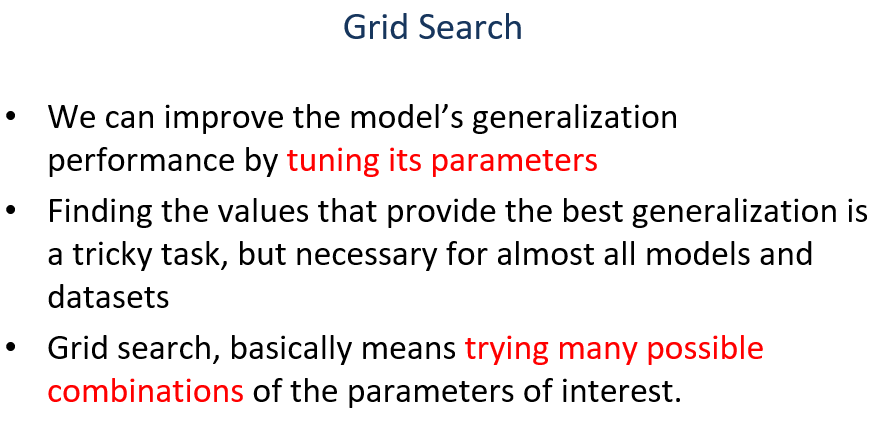

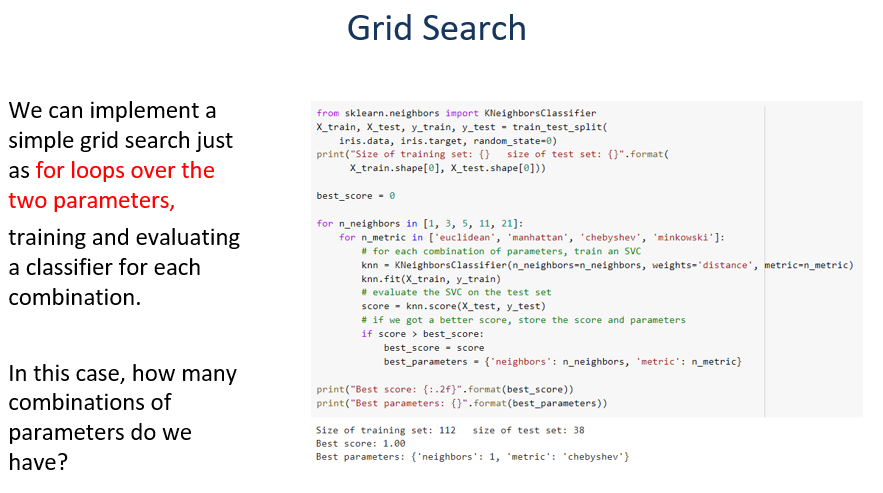

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()

from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


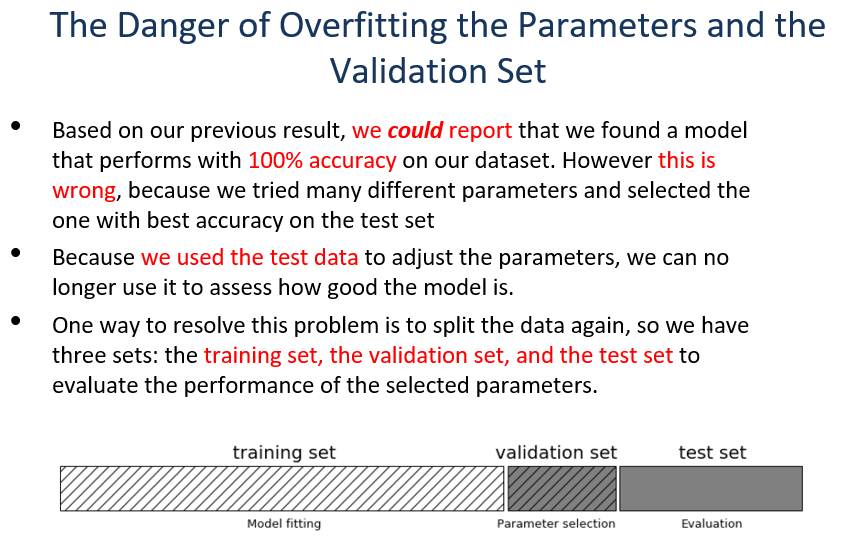

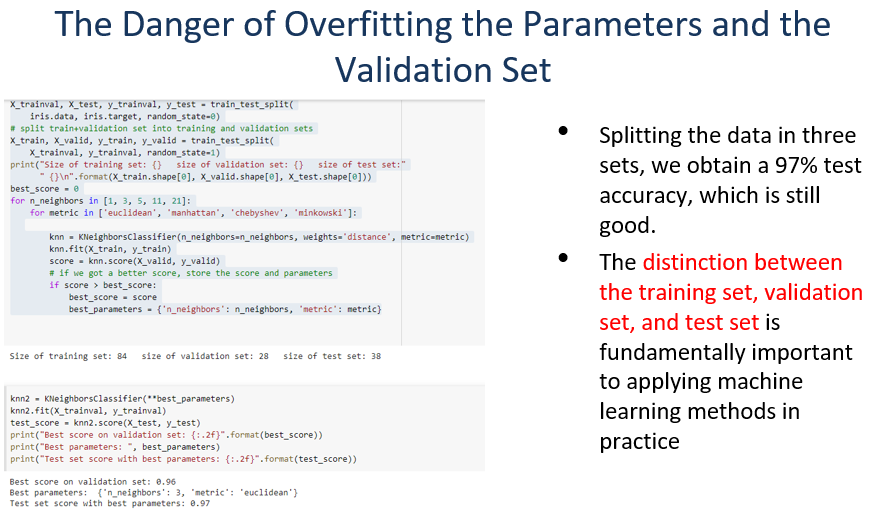

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:  
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


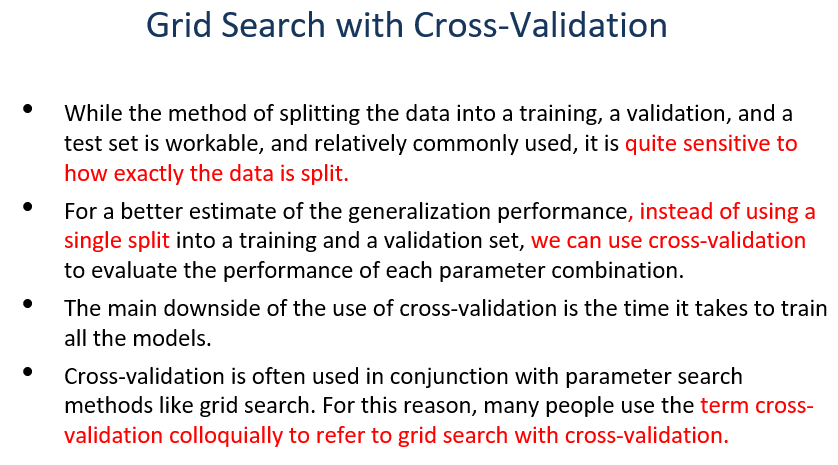

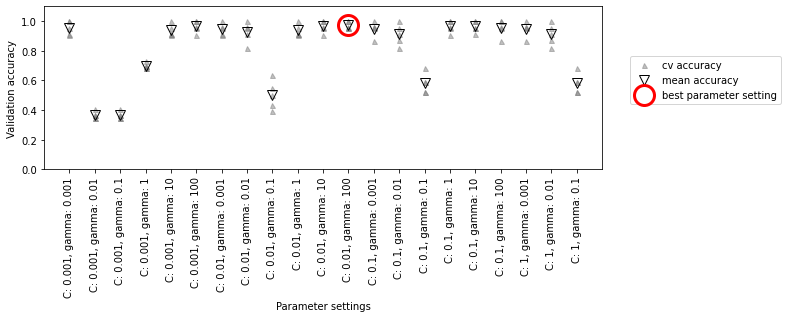

In [ ]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
mglearn.plots.plot_cross_val_selection()

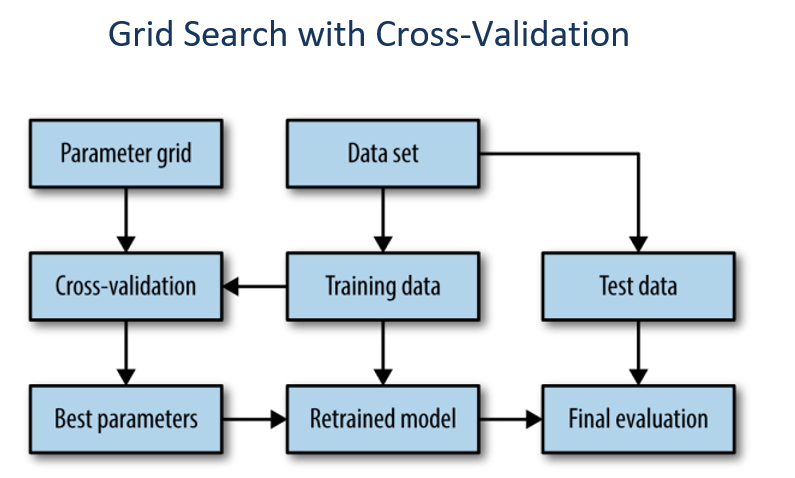

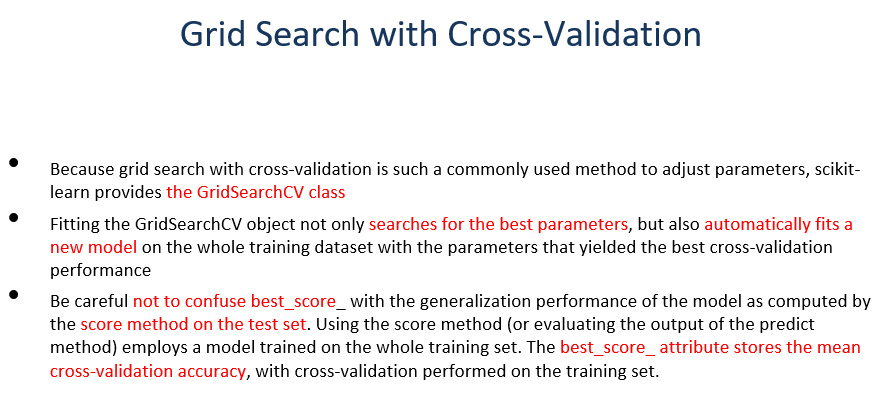

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97
Best estimator:
SVC(C=10, gamma=0.1)


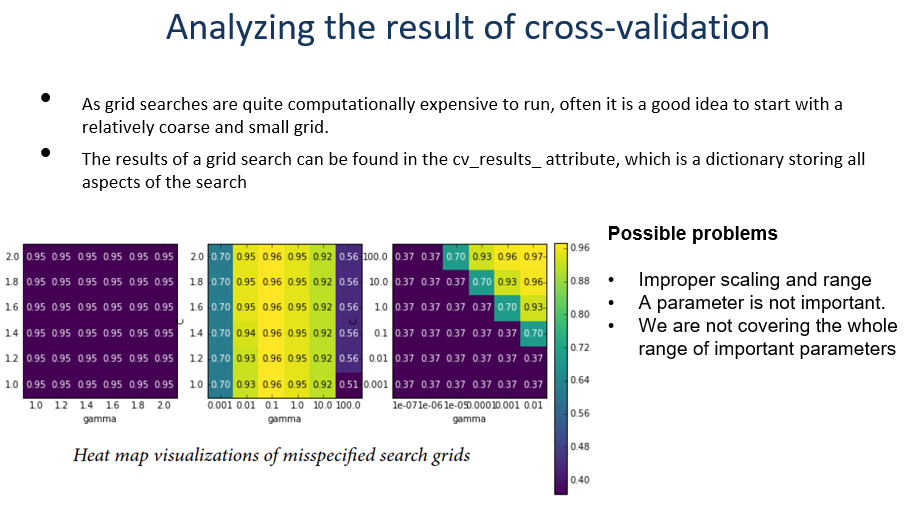

In [ ]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head(21))

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.001018      0.000323         0.000406        0.000061   0.001   
1        0.000840      0.000028         0.000349        0.000009   0.001   
2        0.000842      0.000018         0.000357        0.000008   0.001   
3        0.000852      0.000021         0.000374        0.000023   0.001   
4        0.000865      0.000030         0.000423        0.000117   0.001   
5        0.000916      0.000058         0.000368        0.000026   0.001   
6        0.000793      0.000012         0.000358        0.000043    0.01   
7        0.000800      0.000022         0.000331        0.000004    0.01   
8        0.000835      0.000063         0.000342        0.000011    0.01   
9        0.000797      0.000013         0.000336        0.000010    0.01   
10       0.001041      0.000437         0.000478        0.000267    0.01   
11       0.001193      0.000301         0.000430        0.000125    0.01   
12       0.000850      0.000057         0.000346        0.000009     0.1   
13       0.000843      0.000037         0.000342        0.000011     0.1   
14       0.000823      0.000178         0.000358        0.000041     0.1   
15       0.000848      0.000126         0.000341        0.000021     0.1   
16       0.001071      0.000341         0.000407        0.000104     0.1   
17       0.000973      0.000035         0.000355        0.000009     0.1   
18       0.000789      0.000005         0.000329        0.000004       1   
19       0.000613      0.000015         0.000314        0.000011       1   
20       0.000523      0.000019         0.000278        0.000012       1   

   param_gamma                        params  split0_test_score  \
0        0.001  {'C': 0.001, 'gamma': 0.001}           0.347826   
1         0.01   {'C': 0.001, 'gamma': 0.01}           0.347826   
2          0.1    {'C': 0.001, 'gamma': 0.1}           0.347826   
3            1      {'C': 0.001, 'gamma': 1}           0.347826   
4           10     {'C': 0.001, 'gamma': 10}           0.347826   
5          100    {'C': 0.001, 'gamma': 100}           0.347826   
6        0.001   {'C': 0.01, 'gamma': 0.001}           0.347826   
7         0.01    {'C': 0.01, 'gamma': 0.01}           0.347826   
8          0.1     {'C': 0.01, 'gamma': 0.1}           0.347826   
9            1       {'C': 0.01, 'gamma': 1}           0.347826   
10          10      {'C': 0.01, 'gamma': 10}           0.347826   
11         100     {'C': 0.01, 'gamma': 100}           0.347826   
12       0.001    {'C': 0.1, 'gamma': 0.001}           0.347826   
13        0.01     {'C': 0.1, 'gamma': 0.01}           0.695652   
14         0.1      {'C': 0.1, 'gamma': 0.1}           0.913043   
15           1        {'C': 0.1, 'gamma': 1}           1.000000   
16          10       {'C': 0.1, 'gamma': 10}           0.347826   
17         100      {'C': 0.1, 'gamma': 100}           0.347826   
18       0.001      {'C': 1, 'gamma': 0.001}           0.695652   
19        0.01       {'C': 1, 'gamma': 0.01}           0.913043   
20         0.1        {'C': 1, 'gamma': 0.1}           1.000000   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.347826           0.363636           0.363636   
1            0.347826           0.363636           0.363636   
2            0.347826           0.363636           0.363636   
3            0.347826           0.363636           0.363636   
4            0.347826           0.363636           0.363636   
5            0.347826           0.363636           0.363636   
6            0.347826           0.363636           0.363636   
7            0.347826           0.363636           0.363636   
8            0.347826           0.363636           0.363636   
9            0.347826           0.363636           0.363636   
10           0.347826           0.363636           0.363636   
11           0.347826           0.363636           0.363636   
12           0.347826           0.363

In [ ]:
display(results.mean_test_score)

0     0.366403
1     0.366403
2     0.366403
3     0.366403
4     0.366403
5     0.366403
6     0.366403
7     0.366403
8     0.366403
9     0.366403
10    0.366403
11    0.366403
12    0.366403
13    0.696443
14    0.901581
15    0.955336
16    0.366403
17    0.366403
18    0.696443
19    0.937945
20    0.964032
21    0.946640
22    0.928458
23    0.501581
24    0.937945
25    0.964032
26    0.973123
27    0.946245
28    0.911067
29    0.581423
30    0.964032
31    0.964427
32    0.954941
33    0.946245
34    0.911067
35    0.581423
Name: mean_test_score, dtype: float64

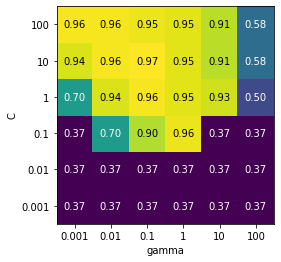

In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

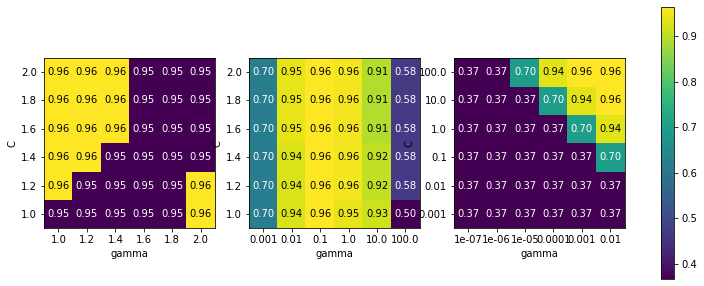

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())